In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix1.csv')

In [3]:
df.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [7]:
df.shape

(8790, 10)

In [8]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8785    False
8786    False
8787    False
8788    False
8789    False
Length: 8790, dtype: bool

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.dropna()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


In [12]:
# 1.What is the distribution of content type?

In [13]:
val = df['type'].value_counts()
print(val)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


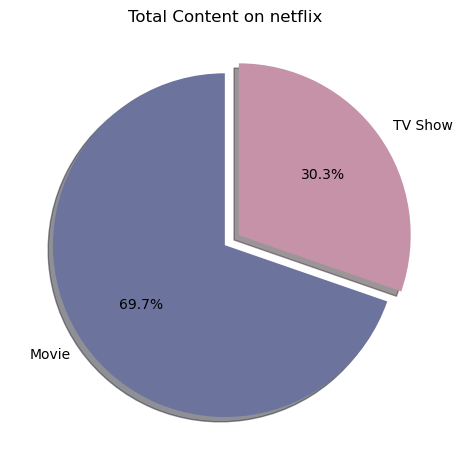

In [14]:
plt.pie(val, labels = ['Movie','TV Show'],colors = ['#6C739C','#C592A8'] ,autopct = '%1.1f%%', startangle = 90, explode = [0,0.1] ,shadow = True)
plt.title("Total Content on netflix")
plt.tight_layout()
plt.show()

In [15]:
# 2.Top 10 countries that produce the most Netflix content

In [16]:
countries = df['country'].value_counts().head(10)
print(countries)

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64


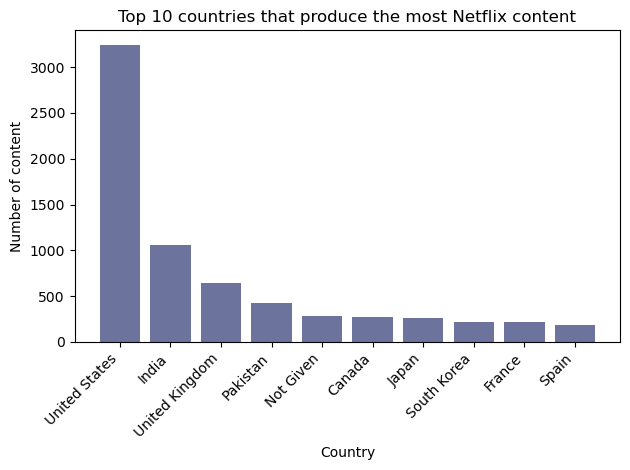

In [17]:
plt.bar(countries.index, countries.values, color = '#6C739C')
plt.title("Top 10 countries that produce the most Netflix content")
plt.xlabel("Country")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of content")
plt.tight_layout()
plt.show()

In [18]:
# Content Added Over Time

In [19]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day

In [20]:
content = df['year_added'].value_counts().sort_index()
print(content)

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64


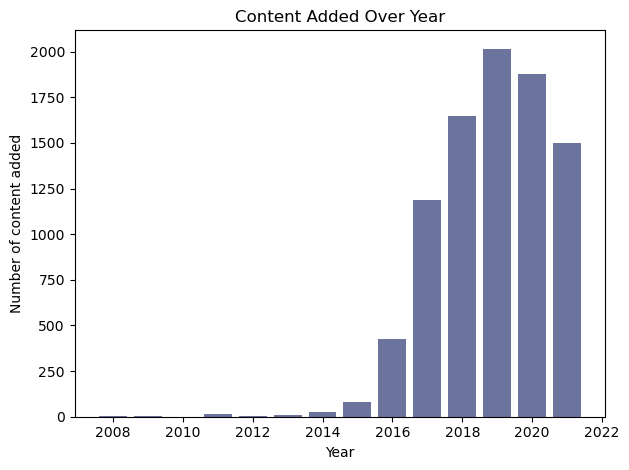

In [21]:
plt.bar(content.index, content.values, color = '#6C739C')
plt.title('Content Added Over Year')
plt.xlabel('Year')
plt.ylabel('Number of content added')
plt.tight_layout()
plt.show()

In [22]:
# Monthly releases of Movies and TV shows on Netflix

In [23]:
monthly_release_movies = df[df['type']=='Movie']['month_added'].value_counts().sort_index()
monthly_release_tvShows = df[df['type']=='TV Show']['month_added'].value_counts().sort_index()

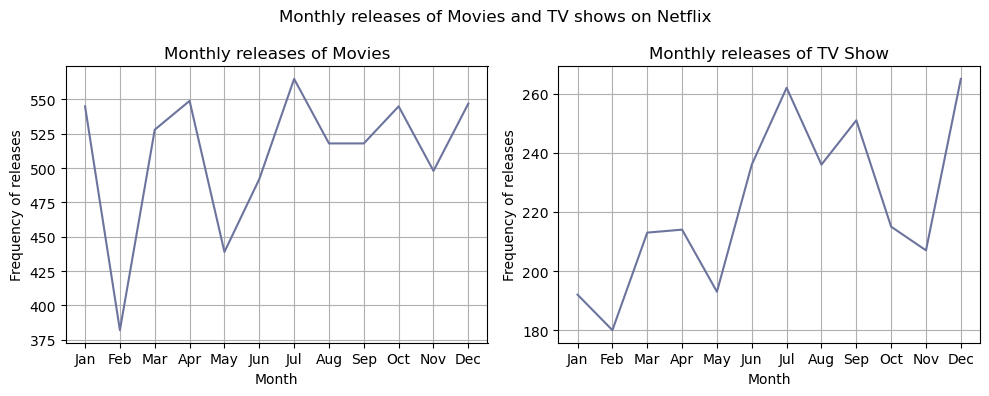

In [24]:
plt.figure(figsize=(10,4)) 
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")

plt.subplot(1,2,1)
plt.plot(monthly_release_movies.index, monthly_release_movies.values,  color = '#6C739C')
plt.title('Monthly releases of Movies')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May',
'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Frequency of releases')
plt.tight_layout()
plt.grid()


plt.subplot(1,2,2)
plt.plot(monthly_release_tvShows.index, monthly_release_tvShows.values,  color = '#6C739C')
plt.title('Monthly releases of TV Show')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May',
'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Frequency of releases')
plt.tight_layout()
plt.grid()

plt.show()

In [25]:
yearly_release_movies = df[df['type']=='Movie']['year_added'].value_counts().sort_index()
yearly_release_tvShows = df[df['type']=='TV Show']['year_added'].value_counts().sort_index()

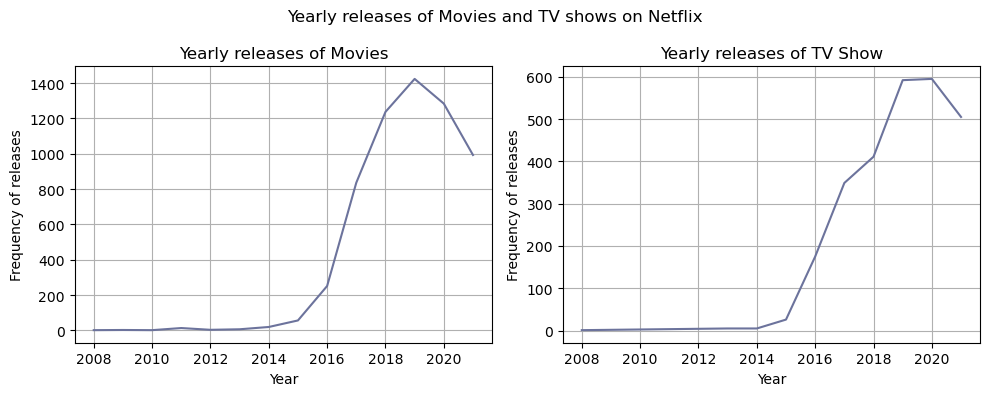

In [26]:
plt.figure(figsize=(10,4)) 
plt.suptitle("Yearly releases of Movies and TV shows on Netflix")

plt.subplot(1,2,1)
plt.plot(yearly_release_movies.index, yearly_release_movies.values, color = '#6C739C')
plt.title('Yearly releases of Movies')
plt.xlabel('Year')
plt.ylabel('Frequency of releases')
plt.tight_layout()
plt.grid()


plt.subplot(1,2,2)
plt.plot(yearly_release_tvShows.index, yearly_release_tvShows.values,  color = '#6C739C')
plt.title('Yearly releases of TV Show')
plt.xlabel('Year')
plt.ylabel('Frequency of releases')
plt.tight_layout()
plt.grid()

plt.show()

In [27]:
# Top 10 Genres

In [28]:
df['genre_list'] = df['listed_in'].str.split(",")

In [29]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added,genre_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25,[Documentaries]
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24,"[Crime TV Shows, International TV Shows, TV ..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,24,"[TV Dramas, TV Horror, TV Mysteries]"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,22,"[Children & Family Movies, Comedies]"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,24,"[Dramas, Independent Movies, International M..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017,1,17,"[International TV Shows, TV Dramas]"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,9,13,[Kids' TV]
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,12,15,"[International TV Shows, Romantic TV Shows, ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018,6,23,[Kids' TV]


In [30]:
geners = df['genre_list'].explode().str.strip().value_counts().head(10)

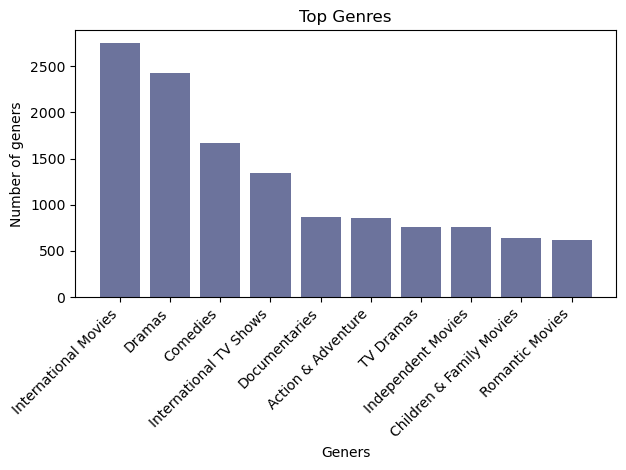

In [31]:
plt.bar(geners.index, geners.values,color = '#6C739C')
plt.title('Top Genres')
plt.xlabel('Geners')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of geners')
plt.tight_layout()

In [32]:
#Top 10 directors

In [33]:
dir_cnt = df['director'].value_counts().head(10)
print("Top 10 directors\n", dir_cnt)

Top 10 directors
 director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Martin Scorsese             12
Name: count, dtype: int64


In [34]:
# rating frequency

In [35]:
rating = df['rating'].value_counts().head(10)
print(rating)

rating
TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
TV-Y7     333
TV-Y      306
PG        287
TV-G      220
NR         79
Name: count, dtype: int64


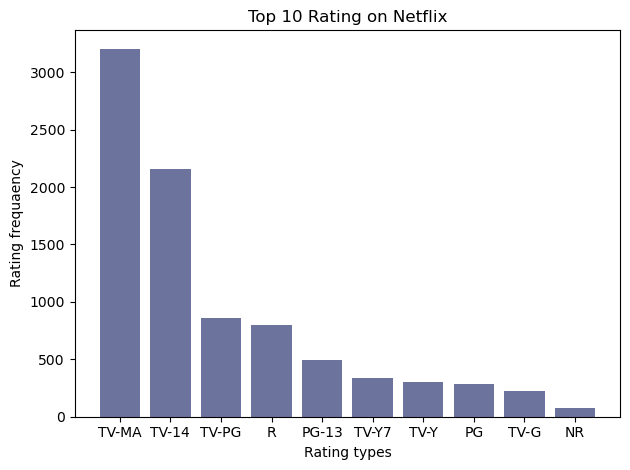

In [36]:
plt.bar(rating.index, rating.values,  color = '#6C739C')
plt.title('Top 10 Rating on Netflix')
plt.xlabel('Rating types')
plt.ylabel('Rating frequaency')
plt.tight_layout()
plt.show()

In [37]:
df.describe()

,date_added,release_year,year_added,month_added,day_added
count,8790,8790.000000,8790.000000,8790.000000,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163,2018.873606,6.655859,12.500000
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000,1.000000
25%,2018-04-06 00:00:00,2013.000000,2018.000000,4.000000,1.000000
50%,2019-07-03 00:00:00,2017.000000,2019.000000,7.000000,13.000000
75%,2020-08-19 18:00:00,2019.000000,2020.000000,10.000000,20.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,12.000000,31.000000
std,NaN,8.825466,1.573568,3.436103,9.887635


In [38]:
movie_geners = df[df['type']=='Movie'].groupby(df['listed_in']).size().sort_values(ascending=False).head(10)
tv_geners = df[df['type']=='TV Show'].groupby(df['listed_in']).size().sort_values(ascending=False).head(10)

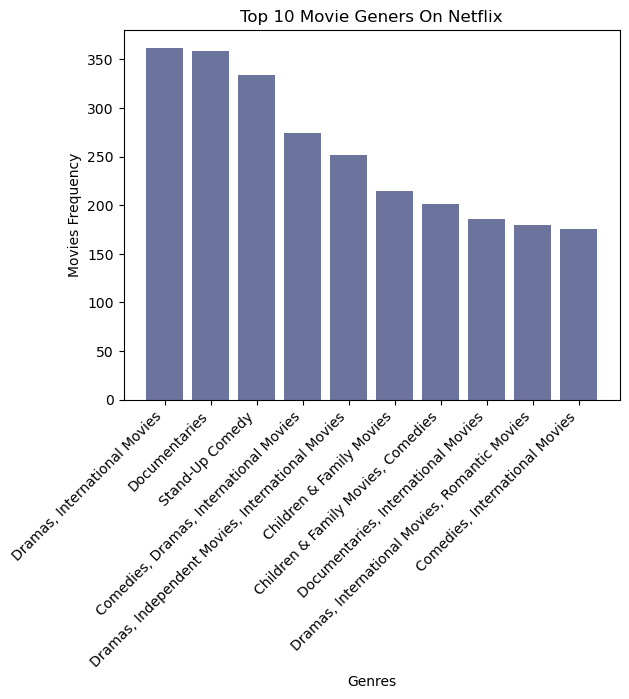

In [39]:
plt.bar(movie_geners.index, movie_geners.values,  color = '#6C739C')
plt.title('Top 10 Movie Geners On Netflix')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.show()

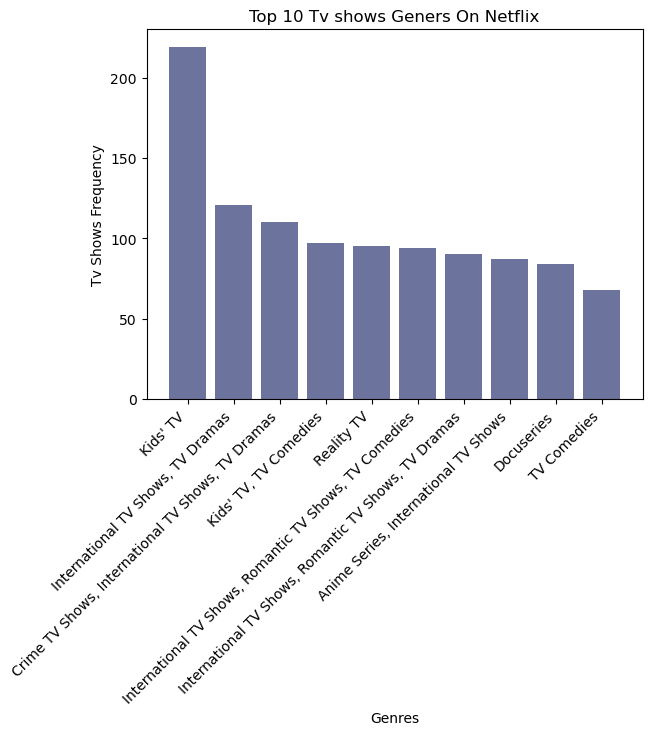

In [40]:
plt.bar(tv_geners.index, tv_geners.values,  color = '#6C739C')
plt.title('Top 10 Tv shows Geners On Netflix')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Tv Shows Frequency")
plt.show()

In [41]:
#duration analysis

In [42]:
df[['duration_num', 'duration_unit']] = df['duration'].str.extract(r"(\d+)\s*(\w+)")

In [43]:
df['duration_num'] = pd.to_numeric(df['duration_num'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8790 non-null   object        
 1   type           8790 non-null   object        
 2   title          8790 non-null   object        
 3   director       8790 non-null   object        
 4   country        8790 non-null   object        
 5   date_added     8790 non-null   datetime64[ns]
 6   release_year   8790 non-null   int64         
 7   rating         8790 non-null   object        
 8   duration       8790 non-null   object        
 9   listed_in      8790 non-null   object        
 10  year_added     8790 non-null   int32         
 11  month_added    8790 non-null   int32         
 12  day_added      8790 non-null   int32         
 13  genre_list     8790 non-null   object        
 14  duration_num   8790 non-null   int64         
 15  duration_unit  8790 n

In [45]:
df['movie_duration'] = df.apply(lambda x : x['duration_num'] if x['duration_unit'] == "min" else None, axis =1)

In [46]:
df['tv_duration'] = df.apply(lambda x : x['duration_num'] if x['duration_unit'] == "Season" else None, axis =1)

In [47]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added,genre_list,duration_num,duration_unit,movie_duration,tv_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25,[Documentaries],90,min,90.0,NaN
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24,"[Crime TV Shows, International TV Shows, TV ...",1,Season,NaN,1.0
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,24,"[TV Dramas, TV Horror, TV Mysteries]",1,Season,NaN,1.0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,22,"[Children & Family Movies, Comedies]",91,min,91.0,NaN
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,24,"[Dramas, Independent Movies, International M...",125,min,125.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017,1,17,"[International TV Shows, TV Dramas]",2,Seasons,NaN,NaN
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,9,13,[Kids' TV],3,Seasons,NaN,NaN
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,12,15,"[International TV Shows, Romantic TV Shows, ...",1,Season,NaN,1.0
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018,6,23,[Kids' TV],1,Season,NaN,1.0


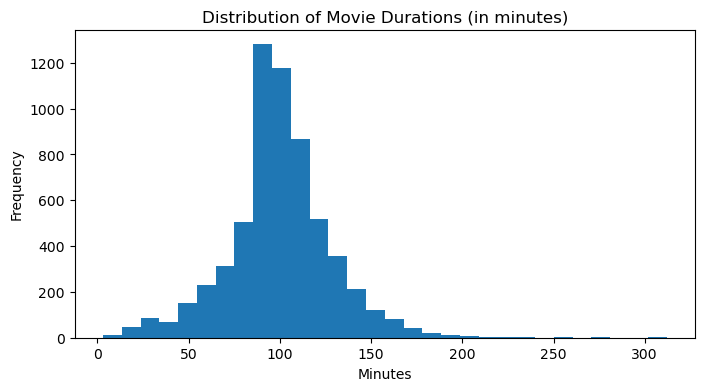

In [48]:
df['movie_duration'].plot(kind="hist", bins = 30 ,figsize=(8,4))
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

In [49]:
print(f'Average movie duration : {df['movie_duration'].mean():.2f}')
print('Logest movie duration : ',df['movie_duration'].max())
print('Shortest movie duration : ',df['movie_duration'].min())

Average movie duration : 99.58
Logest movie duration :  312.0
Shortest movie duration :  3.0


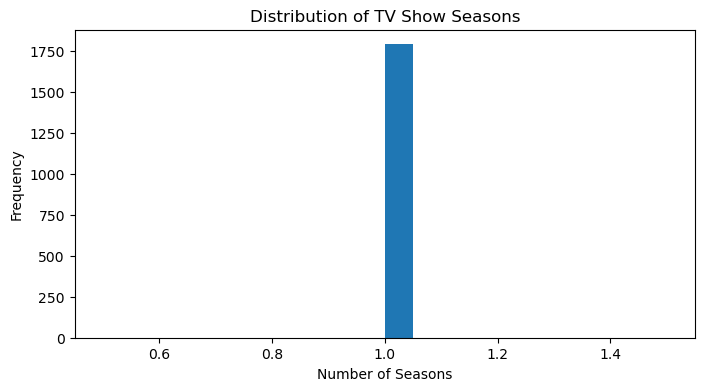

In [50]:
df['tv_duration'].plot(kind="hist", bins = 20 ,figsize=(8,4))
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.show()

In [51]:
print(f'Average Season : {df['tv_duration'].mean()}')
print('Maximum Season : ',df['tv_duration'].max())
print('Minimum Season : ',df['tv_duration'].min())

Average Season : 1.0
Maximum Season :  1.0
Minimum Season :  1.0


In [52]:
# Detect Outliers

In [53]:
movies = df[df['type'] == 'Movie']

In [54]:
movie_outlier = movies[movies['movie_duration'] > movies['movie_duration'].quantile(0.95)]
print("Movies longer than 95th percentile:")
print(movie_outlier[['title','duration']])

Movies longer than 95th percentile:
                            title duration
29                          Jeans  166 min
53                Avvai Shanmughi  161 min
95                   King of Boys  182 min
151   Headspace: Unwind Your Mind  273 min
198                 Cold Mountain  154 min
...                           ...      ...
6517                      Yaadein  171 min
6520          Yanda Kartavya Aahe  151 min
6530                 You Carry Me  157 min
6541                       Zodiac  158 min
7822   Black Mirror: Bandersnatch  312 min

[296 rows x 2 columns]


In [55]:
tv = df[df['type'] == 'TV Show']

In [56]:
tv_outlier = tv[tv['tv_duration'] > tv['tv_duration'].quantile(0.95)]
print("TV Shows with very high number of seasons:")
print(tv[['title','duration']])

TV Shows with very high number of seasons:
                                title   duration
1                           Ganglands   1 Season
2                       Midnight Mass   1 Season
5       The Great British Baking Show  9 Seasons
17              Jailbirds New Orleans   1 Season
18    Crime Stories: India Detectives   1 Season
...                               ...        ...
8785                       Yunus Emre  2 Seasons
8786                        Zak Storm  3 Seasons
8787               Zindagi Gulzar Hai   1 Season
8788                             Yoko   1 Season
8789                              YOM   1 Season

[2664 rows x 2 columns]


In [57]:
# Boxplots for easy outlier visualization

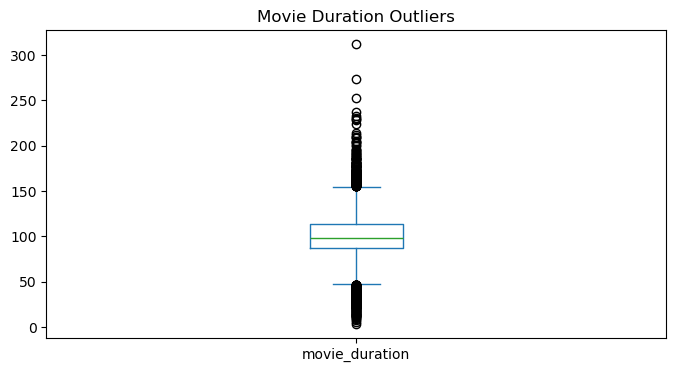

In [58]:
movies['movie_duration'].plot(kind='box', figsize=(8,4))
plt.title('Movie Duration Outliers')
plt.show()

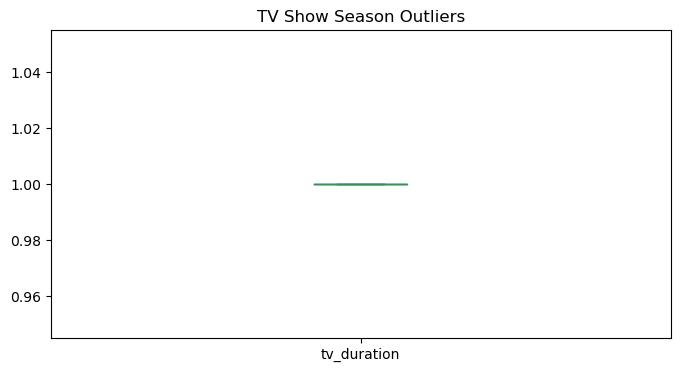

In [59]:
tv['tv_duration'].plot(kind='box', figsize=(8,4))
plt.title('TV Show Season Outliers')
plt.show()

In [60]:
# Movies added per year

In [61]:
movies = df[df['type'] == 'Movie']

In [62]:
movies_add_pr_year = movies['year_added'].value_counts().sort_index()

In [63]:
movies_add_pr_year

year_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     251
2017     836
2018    1237
2019    1424
2020    1284
2021     993
Name: count, dtype: int64

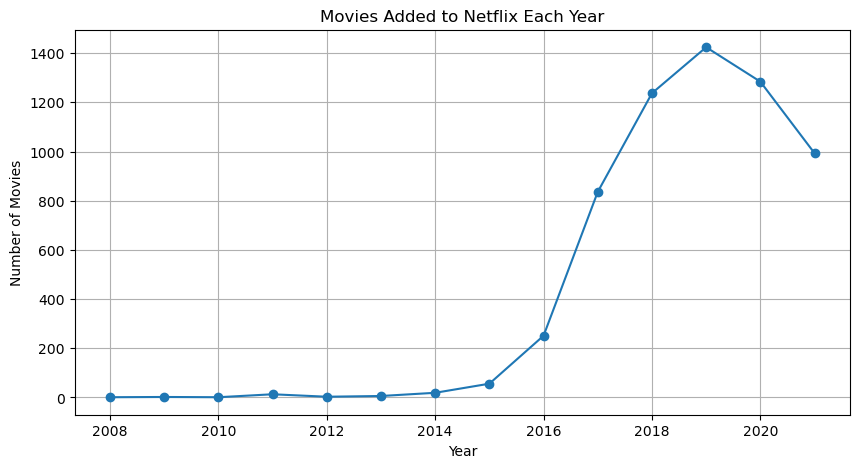

In [64]:
plt.figure(figsize=(10,5))
plt.plot(movies_add_pr_year.index, movies_add_pr_year.values, marker="o")
plt.title("Movies Added to Netflix Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

In [65]:
# Tv shows added per year

In [66]:
tv = df[df['type'] == 'TV Show']

In [67]:
tv_add_pr_year = tv['year_added'].value_counts().sort_index()

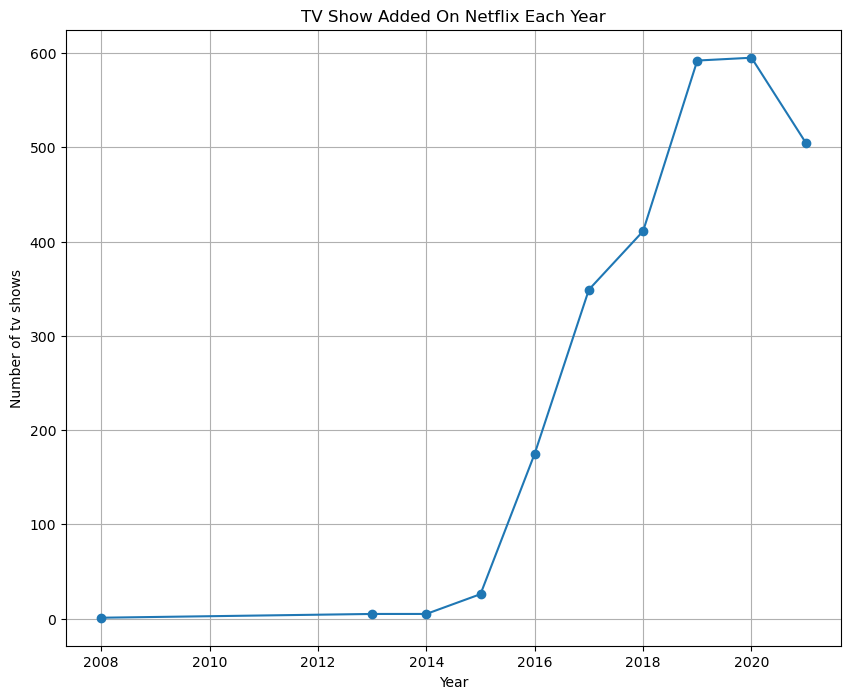

In [68]:
plt.figure(figsize = (10,8))
plt.plot(tv_add_pr_year.index, tv_add_pr_year.values, marker = "o")
plt.title('TV Show Added On Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of tv shows')
plt.grid(True)
plt.show()

In [69]:
# Which countries produce which types of content?

In [70]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added,genre_list,duration_num,duration_unit,movie_duration,tv_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,25,[Documentaries],90,min,90.0,NaN
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,24,"[Crime TV Shows, International TV Shows, TV ...",1,Season,NaN,1.0
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,24,"[TV Dramas, TV Horror, TV Mysteries]",1,Season,NaN,1.0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,22,"[Children & Family Movies, Comedies]",91,min,91.0,NaN
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,24,"[Dramas, Independent Movies, International M...",125,min,125.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017,1,17,"[International TV Shows, TV Dramas]",2,Seasons,NaN,NaN
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,9,13,[Kids' TV],3,Seasons,NaN,NaN
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,12,15,"[International TV Shows, Romantic TV Shows, ...",1,Season,NaN,1.0
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018,6,23,[Kids' TV],1,Season,NaN,1.0


In [71]:
movie_cntry = movies['country'].value_counts().sort_values(ascending=False).head(15)

In [72]:
movie_cntry

country
United States     2395
India              976
United Kingdom     387
Not Given          257
Canada             187
France             148
Spain              129
Egypt              109
Nigeria             96
Mexico              90
Japan               87
Indonesia           84
Turkey              82
Philippines         80
Germany             79
Name: count, dtype: int64

In [73]:
tv_cntry = tv['country'].value_counts().sort_values(ascending=False).head(15)

In [74]:
tv_cntry

country
United States     845
Pakistan          350
United Kingdom    251
Japan             172
South Korea       165
Canada             84
India              81
Taiwan             71
France             65
Spain              53
Australia          53
Mexico             48
China              41
Not Given          30
Turkey             30
Name: count, dtype: int64

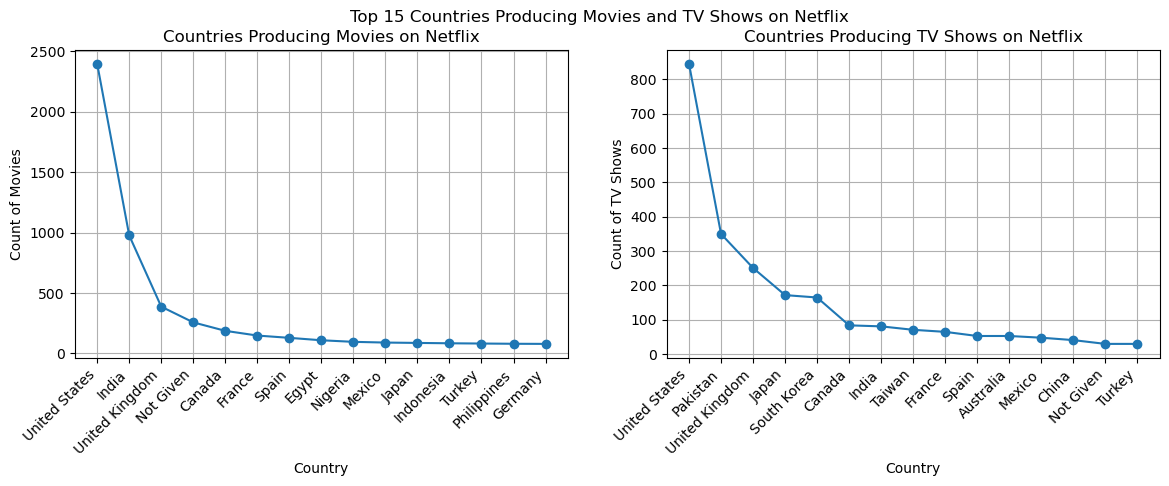

In [75]:
plt.figure(figsize=(14,4))
plt.suptitle('Top 15 Countries Producing Movies and TV Shows on Netflix')
plt.subplot(1,2,1)
plt.plot(movie_cntry.index, movie_cntry.values, marker = 'o')
plt.title('Countries Producing Movies on Netflix')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count of Movies')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(tv_cntry.index, tv_cntry.values, marker = 'o')
plt.title('Countries Producing TV Shows on Netflix')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count of TV Shows')
plt.grid(True)
plt.show()

In [76]:
df.to_excel('cleaned_data.xlsx', index=False)